In [5]:
from postgres_utils import PostgresPandas
from reprocess import merge_dataframes
import pandas as pd
import numpy as np

In [9]:
%matplotlib inline

In [2]:
ppd = PostgresPandas()

In [3]:
tickers_of_interest = ['tsla', 'shak', 'ddd', 'cmg', 'ntdoy']

ppd.create_tables(*tickers_of_interest)

*** Database for the ticker: tsla already exist! ***
*** Database for the ticker: shak already exist! ***
*** Database for the ticker: ddd already exist! ***
*** Database for the ticker: cmg already exist! ***
*** Unkown Error in processing ntdoy


In [4]:
tickers_dict = ppd.get_tables(*tickers_of_interest)

*** Exception occurred for ntdoy ***


In [6]:
merged_dataframe = merge_dataframes(tickers_dict)

In [11]:
merged_dataframe[:10]

,date,close_tsla,close_shak,close_ddd,close_cmg
0,2015-01-30,203.60,45.90,29.08,709.84
1,2015-02-02,210.94,43.99,30.25,712.55
2,2015-02-03,218.36,44.98,28.62,726.63
3,2015-02-04,218.55,41.32,28.83,676.00
4,2015-02-05,220.99,42.64,29.64,670.91
5,2015-02-06,217.36,41.96,28.49,659.92
6,2015-02-09,217.48,41.50,28.86,648.01
7,2015-02-10,216.29,41.50,29.77,665.03
8,2015-02-11,212.80,41.50,31.41,669.64
9,2015-02-12,202.88,40.65,32.41,670.29


In [17]:
merged_dataframe = merged_dataframe.rename(lambda x: x.split('_')[1] if 'close' in x else x, axis=1)

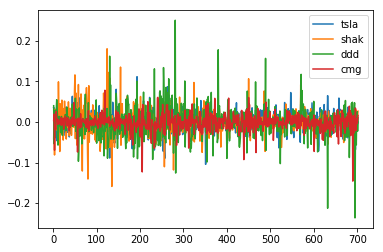

In [23]:
merged_dataframe[tickers_of_interest[:-1]].pct_change().plot()

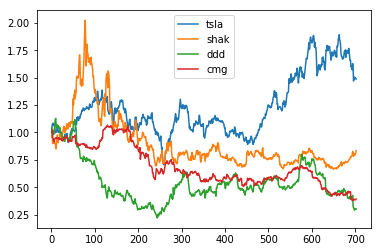

In [34]:
pd.DataFrame(merged_dataframe[tickers_of_interest[:-1]].pct_change()+1).cumprod().plot()
#merged_dataframe[tickers_of_interest[:-1]].pct_change().dropna().cumprod().plot()

In [35]:
del ppd

In [36]:
work_with = merged_dataframe[tickers_of_interest[:-1]]

In [37]:
work_with[:5]

,tsla,shak,ddd,cmg
0,203.60,45.90,29.08,709.84
1,210.94,43.99,30.25,712.55
2,218.36,44.98,28.62,726.63
3,218.55,41.32,28.83,676.00
4,220.99,42.64,29.64,670.91
